## Backtesting SMA Crossover Strategy

A strategy that uses two Simple Moving Averages of different lengths. A Simple Moving Average gives equal weight to all prices in its calculation window.

How it works:

    You calculate a short-term SMA (e.g., 50-day) and a long-term SMA (e.g., 200-day).

    A "buy" signal occurs when the short-term SMA crosses above the long-term SMA (a "Golden Cross").

    A "sell" signal occurs when the short-term SMA crosses below the long-term SMA (a "Death Cross").

Purpose: To identify the general trend direction. It's a relatively slow-moving, trend-following indicator.

Key Characteristic: Lags behind the price, as it's based on historical averages. The "simple" in SMA means old data points have the same influence as recent data points within the window.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("data/TSLA_data.csv")
df.head(20)

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,14.620667457580566,14.883333206176758,14.21733283996582,14.857999801635742,71466000
3,2015-01-05,14.005999565124512,14.433333396911621,13.810667037963867,14.303333282470703,80527500
4,2015-01-06,14.085332870483398,14.279999732971191,13.61400032043457,14.003999710083008,93928500
5,2015-01-07,14.063332557678223,14.3186674118042,13.985333442687988,14.223333358764648,44526000
6,2015-01-08,14.041333198547363,14.25333309173584,14.000666618347168,14.187333106994629,51637500
7,2015-01-09,13.77733325958252,13.998666763305664,13.663999557495117,13.928000450134277,70024500
8,2015-01-12,13.480667114257812,13.631333351135254,13.283332824707031,13.536666870117188,89254500
9,2015-01-13,13.616666793823242,13.840666770935059,13.394000053405762,13.554667472839355,67159500


In [3]:
df.drop([0,1], axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [4]:
df.head(20)

,Price,Close,High,Low,Open,Volume
0,2015-01-02,14.620667457580566,14.883333206176758,14.21733283996582,14.857999801635742,71466000
1,2015-01-05,14.005999565124512,14.433333396911621,13.810667037963867,14.303333282470703,80527500
2,2015-01-06,14.085332870483398,14.279999732971191,13.61400032043457,14.003999710083008,93928500
3,2015-01-07,14.063332557678223,14.3186674118042,13.985333442687988,14.223333358764648,44526000
4,2015-01-08,14.041333198547363,14.25333309173584,14.000666618347168,14.187333106994629,51637500
5,2015-01-09,13.77733325958252,13.998666763305664,13.663999557495117,13.928000450134277,70024500
6,2015-01-12,13.480667114257812,13.631333351135254,13.283332824707031,13.536666870117188,89254500
7,2015-01-13,13.616666793823242,13.840666770935059,13.394000053405762,13.554667472839355,67159500
8,2015-01-14,12.845999717712402,13.013333320617676,12.333333015441895,12.388667106628418,173278500
9,2015-01-15,12.791333198547363,13.050000190734863,12.666666984558105,12.965999603271484,78247500


In [5]:
df.rename({'Price':'Date'}, axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2624 non-null   object
 1   Close   2624 non-null   object
 2   High    2624 non-null   object
 3   Low     2624 non-null   object
 4   Open    2624 non-null   object
 5   Volume  2624 non-null   object
dtypes: object(6)
memory usage: 123.1+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [8]:
# Ensure numeric columns are properly typed
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [9]:
# Sort by date descending
df_sorted = df.sort_values('Date', ascending=False)

df_sorted.head()

,Close,High,Low,Open,Volume
Date,,,,,
2025-06-09,308.579987,309.829987,281.850006,285.959991,138958000
2025-06-06,295.140015,305.500000,291.140015,298.829987,164747700
2025-06-05,284.700012,324.549988,273.209991,322.489990,287499800
2025-06-04,332.049988,345.600006,327.329987,345.100006,98912100
2025-06-03,344.269989,355.399994,343.040009,346.600006,99324500


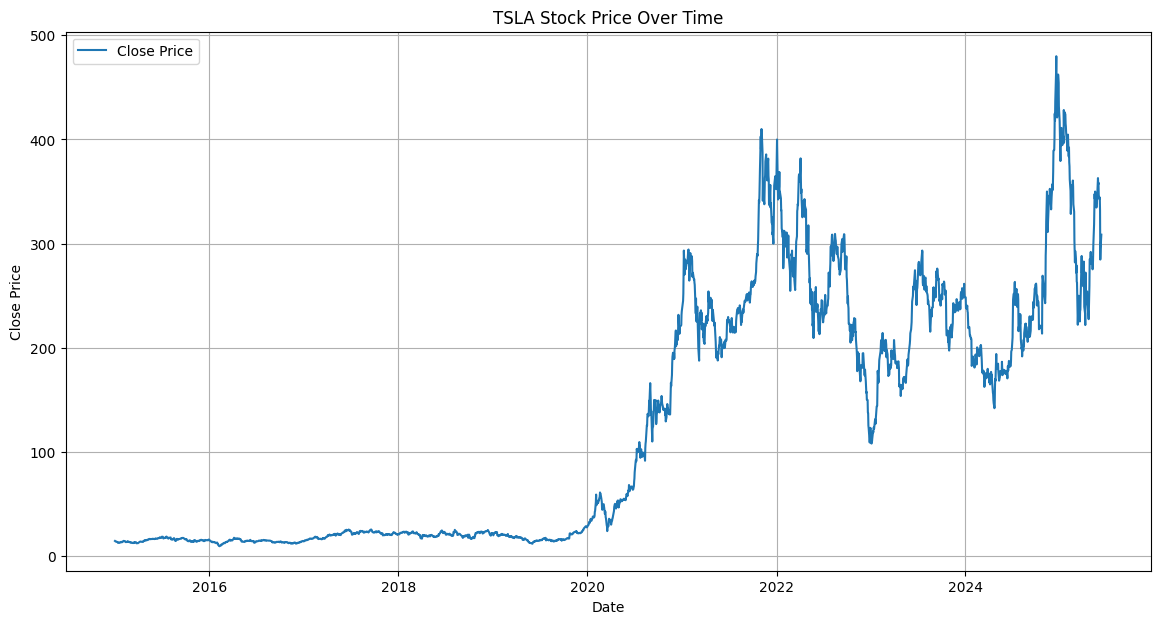

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('TSLA Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

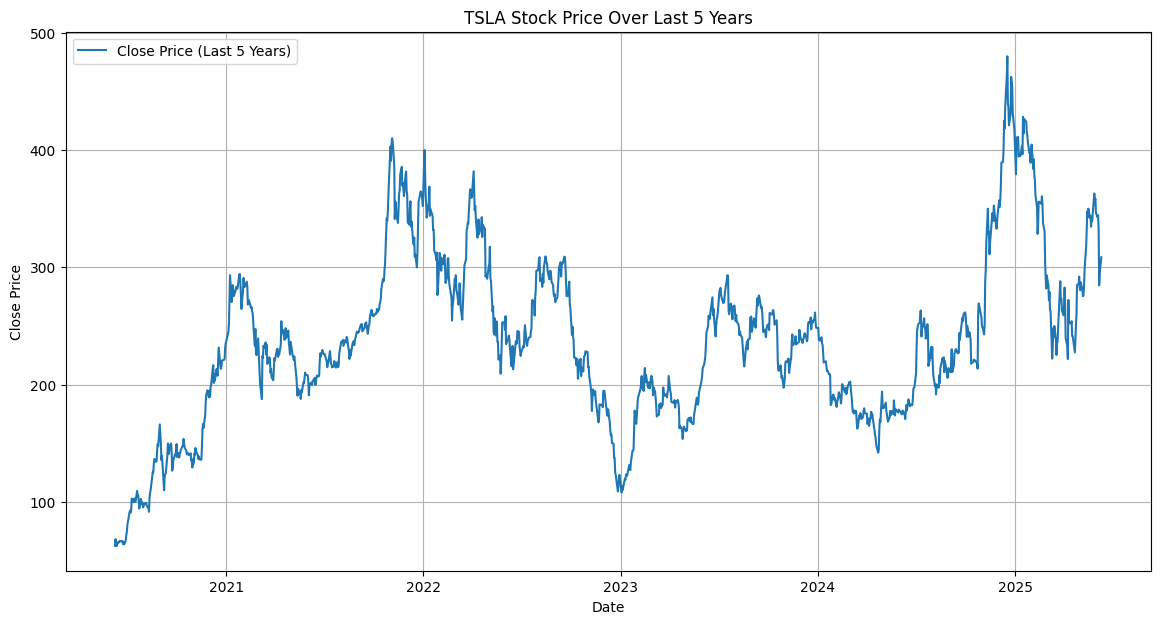

In [11]:
# Filter the dataframe for the last 5 years
last_5_years = df.loc[df.index >= (df.index.max() - pd.DateOffset(years=5))]

plt.figure(figsize=(14, 7))
plt.plot(last_5_years.index, last_5_years['Close'], label='Close Price (Last 5 Years)')
plt.title('TSLA Stock Price Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
shorter_window = 20
short_window = 50
long_window = 200
df['SMA50'] = df['Close'].rolling(window=short_window).mean()
df['SMA200'] = df['Close'].rolling(window=long_window).mean()
df['SMA20'] = df['Close'].rolling(window=shorter_window).mean()
df.tail()

,Close,High,Low,Open,Volume,SMA50,SMA200,SMA20
Date,,,,,,,,
2025-06-03,344.269989,355.399994,343.040009,346.600006,99324500,290.453202,303.77825,332.006502
2025-06-04,332.049988,345.600006,327.329987,345.100006,98912100,291.526401,304.36780,334.841501
2025-06-05,284.700012,324.549988,273.209991,322.489990,287499800,291.457601,304.71070,335.265501
2025-06-06,295.140015,305.500000,291.140015,298.829987,164747700,291.919201,305.07280,335.781502
2025-06-09,308.579987,309.829987,281.850006,285.959991,138958000,292.628201,305.51020,336.297501


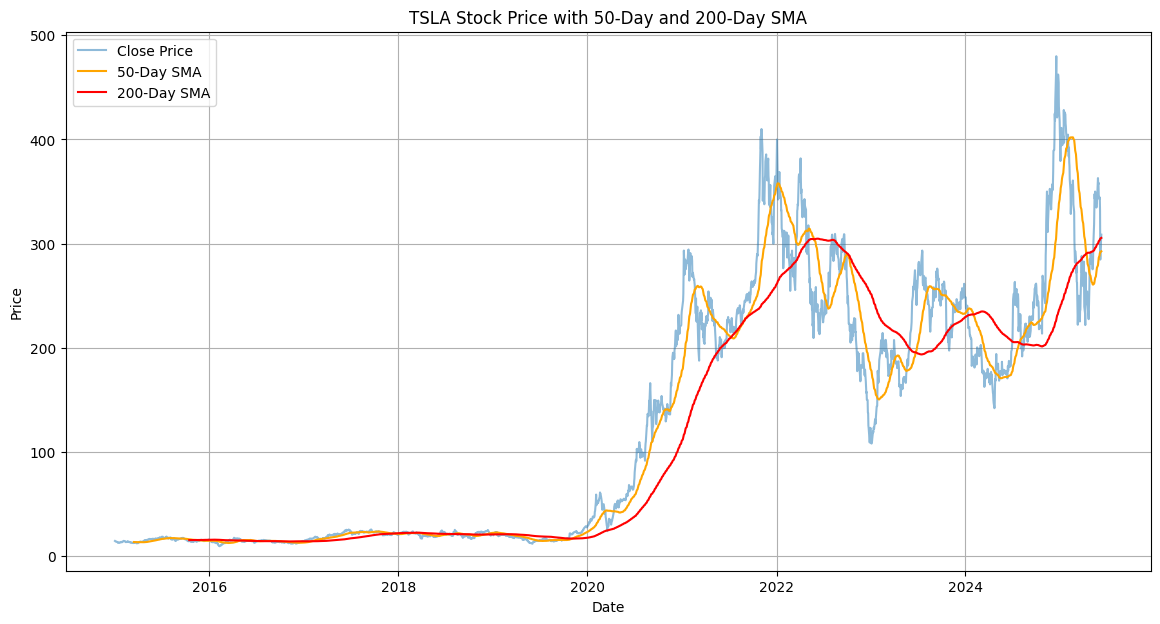

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5) 
plt.plot(df.index, df['SMA50'], label='50-Day SMA', color='orange')
plt.plot(df.index, df['SMA200'], label='200-Day SMA', color='red')  
plt.title('TSLA Stock Price with 50-Day and 200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

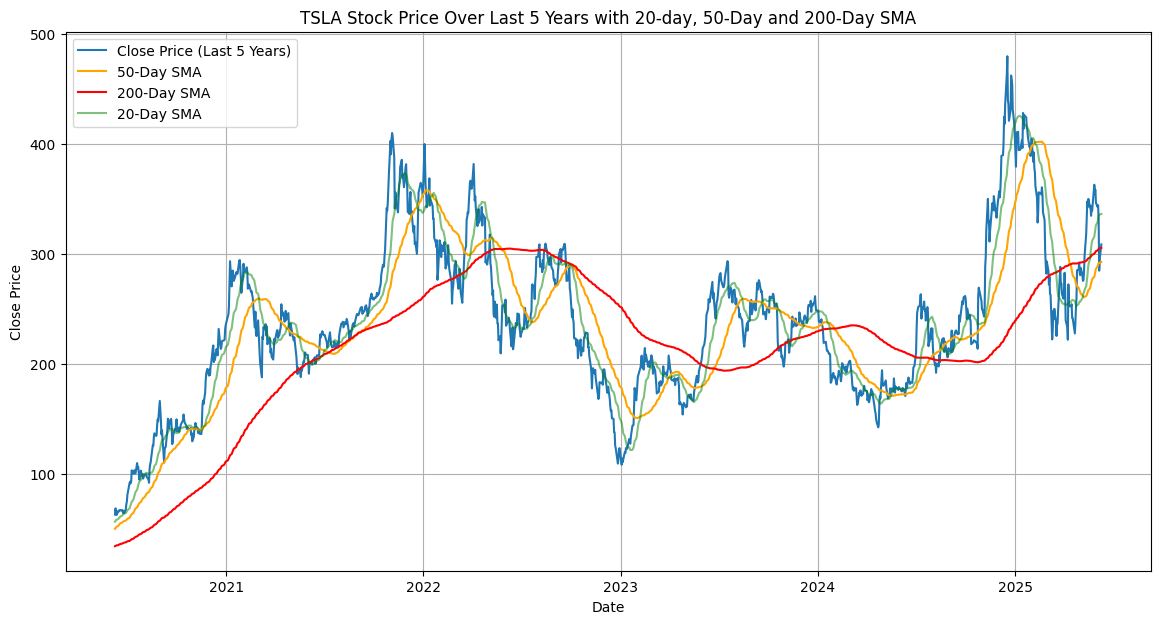

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(last_5_years.index, last_5_years['Close'], label='Close Price (Last 5 Years)')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'SMA50'], label='50-Day SMA', color='orange' )
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'SMA200'], label='200-Day SMA', color='red')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'SMA20'], label='20-Day SMA', color='green',alpha=0.5)
plt.title('TSLA Stock Price Over Last 5 Years with 20-day, 50-Day and 200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### Generating trading signals

    Buy Signal (Golden Cross): When the short-term SMA (SMA50) crosses above the long-term SMA (SMA200). We will represent this with a 1.

    Sell Signal (Death Cross): When the short-term SMA crosses below the long-term SMA. We will represent this with a 0.

In [15]:
# Set signal to 1 when SMA50 > SMA200, otherwise 0
df['Signal'] = np.where(df['SMA50'] > df['SMA200'], 1.0, 0.0)

In [16]:
df['Position'] = df['Signal'].diff() #position is the change in signal from the previous day

1.0 in 'Position': This means the 'Signal' column changed from 0.0 on the previous day to 1.0 on the current day. This signifies that the SMA50 has just crossed above the SMA200 – a "buy" signal (Golden Cross) has just occurred.

-1.0 in 'Position': This means the 'Signal' column changed from 1.0 on the previous day to 0.0 on the current day. This signifies that the SMA50 has just crossed below the SMA200 – a "sell" signal (Death Cross) has just occurred.

0.0 in 'Position': This means there was no change in the 'Signal' column from the previous day. 
The relative position of SMA50 and SMA200 remained the same (e.g., SMA50 was above SMA200 yesterday and is still above today, or it was below and is still below). No new crossover event happened on this day.

In [17]:
df.head()

,Close,High,Low,Open,Volume,SMA50,SMA200,SMA20,Signal,Position
Date,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN,NaN,0.0,NaN
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,NaN,NaN,NaN,0.0,0.0
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,NaN,NaN,NaN,0.0,0.0
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,NaN,NaN,NaN,0.0,0.0
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,NaN,NaN,NaN,0.0,0.0


In [18]:
df[df['Position'] != 0].head(10)

,Close,High,Low,Open,Volume,SMA50,SMA200,SMA20,Signal,Position
Date,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN,NaN,0.0,NaN
2015-10-16,15.134000,15.365333,14.858000,14.869333,65017500,16.211360,15.453410,16.013900,1.0,1.0
2015-11-16,14.287333,14.332000,13.720000,13.739333,43881000,15.512107,15.542197,14.381033,0.0,-1.0
2016-05-02,16.120001,16.212667,15.654667,16.100000,57658500,15.161107,15.099217,16.757867,1.0,1.0
2016-07-07,14.396000,14.541333,14.200667,14.206667,54180000,14.502093,14.530880,14.137567,0.0,-1.0
2016-07-21,14.700000,15.190000,14.606667,15.066667,66430500,14.435893,14.434857,14.347533,1.0,1.0
2016-10-05,13.897333,14.210000,13.874667,14.149333,28162500,14.294307,14.314223,13.592867,0.0,-1.0
2017-01-31,16.795334,17.059334,16.513332,16.615999,61741500,14.283027,14.280353,15.954700,1.0,1.0
2017-12-12,22.735332,22.762667,22.002001,22.030001,130998000,21.707373,21.721550,20.926666,0.0,-1.0


In [19]:
# --- 4. CALCULATE RETURNS & BACKTEST ---
# Calculate daily returns of the stock
df['Market Returns'] = df['Close'].pct_change()
# Calculate strategy returns (CRITICAL: use shift(1) to prevent lookahead bias)
df['Strategy Returns'] = df['Market Returns'] * df['Signal'].shift(1)
print("Backtest complete.")

Backtest complete.


In [20]:
df['Strategy Returns'].describe()

count    2623.000000
mean        0.001110
std         0.028936
min        -0.210628
25%         0.000000
50%         0.000000
75%         0.001950
max         0.226900
Name: Strategy Returns, dtype: float64

here the attempt is to compare this to buy and holding

Buy and Hold is a passive investment philosophy. - The Philosophy: "Time in the market beats timing the market." The core belief is that financial markets trend upwards over the long term, and trying to predict the short-term ups and downs is a futile and costly exercise.


SMA Crossover is an active, rules-based trading strategy that serves as an alternative. The Philosophy: "It is possible to improve returns or reduce risk by avoiding major downtrends." The core belief is that while you can't predict the future, you can identify the current primary trend and align your position with it.

In [21]:
# Calculate cumulative returns
df['Cumulative Market Returns'] = (1 + df['Market Returns']).cumprod()
df['Cumulative Strategy Returns'] = (1 + df['Strategy Returns']).cumprod()

print("\n--- Final Results for TSLA ---")
print(f"Buy and Hold Cumulative Return: {df['Cumulative Market Returns'].iloc[-1]:.2f}")
print(f"SMA Strategy Cumulative Return: {df['Cumulative Strategy Returns'].iloc[-1]:.2f}")


--- Final Results for TSLA ---
Buy and Hold Cumulative Return: 21.11
SMA Strategy Cumulative Return: 6.18


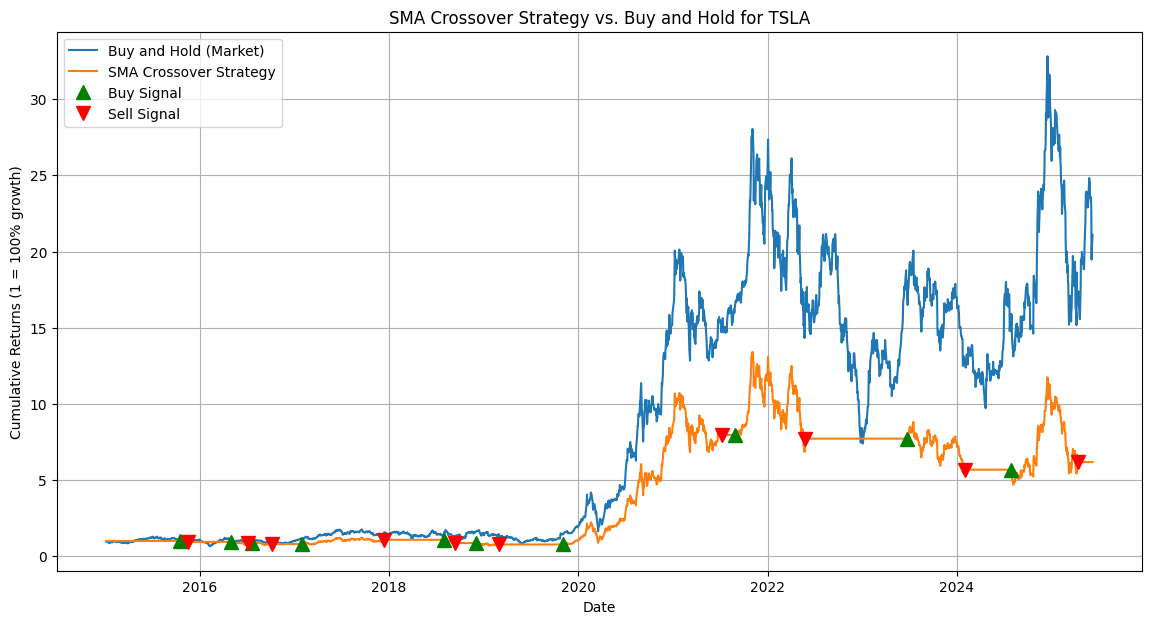

In [22]:
# Plot the equity curves
plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative Market Returns'], label='Buy and Hold (Market)')
plt.plot(df['Cumulative Strategy Returns'], label='SMA Crossover Strategy')

# Plot buy/sell signals on the equity curve for context
plt.plot(df[df['Signal'].diff() == 1.0].index, 
         df['Cumulative Strategy Returns'][df['Signal'].diff() == 1.0],
         '^', markersize=10, color='g', label='Buy Signal')

plt.plot(df[df['Signal'].diff() == -1.0].index, 
         df['Cumulative Strategy Returns'][df['Signal'].diff() == -1.0],
         'v', markersize=10, color='r', label='Sell Signal')


plt.title(f'SMA Crossover Strategy vs. Buy and Hold for TSLA')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (1 = 100% growth)')
plt.legend()
plt.grid()
plt.show()

Whipsaws: periods where the price was moving sideways. You might see several buy and sell signals close together, causing the strategy's performance to flatten or dip while the buy-and-hold line chopped around. This is a classic weakness of trend-following systems in non-trending markets.

This is noticeable from the year 2025-2020 where the stock price of Tesla has remained at the constant value. 

## EMA Crossover Strategy

In [23]:
# The pandas 'ewm' function is used for exponential moving averages
short_ema_period = 12
long_ema_period = 26
signal_ema_period = 9

# Calculate the Short and Long EMAs
df['EMA12'] = df['Close'].ewm(span=short_ema_period, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=long_ema_period, adjust=False).mean()

# Calculate the MACD Line
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate the Signal Line
df['Signal Line'] = df['MACD'].ewm(span=signal_ema_period, adjust=False).mean()

# Calculate the Histogram (optional, but good for visualization)
df['Histogram'] = df['MACD'] - df['Signal Line']

In [25]:
df.head()

,Close,High,Low,Open,Volume,SMA50,SMA200,SMA20,Signal,Position,Market Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns,EMA12,EMA26,MACD,Signal Line,Histogram
Date,,,,,,,,,,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,14.620667,14.620667,0.000000,0.000000,0.000000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,NaN,NaN,NaN,0.0,0.0,-0.042041,-0.0,0.957959,1.0,14.526103,14.575137,-0.049033,-0.009807,-0.039227
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,NaN,NaN,NaN,0.0,0.0,0.005664,0.0,0.963385,1.0,14.458292,14.538855,-0.080562,-0.023958,-0.056605
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,NaN,NaN,NaN,0.0,0.0,-0.001562,-0.0,0.961880,1.0,14.397529,14.503631,-0.106102,-0.040387,-0.065715
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,NaN,NaN,NaN,0.0,0.0,-0.001564,-0.0,0.960376,1.0,14.342730,14.469387,-0.126657,-0.057641,-0.069016


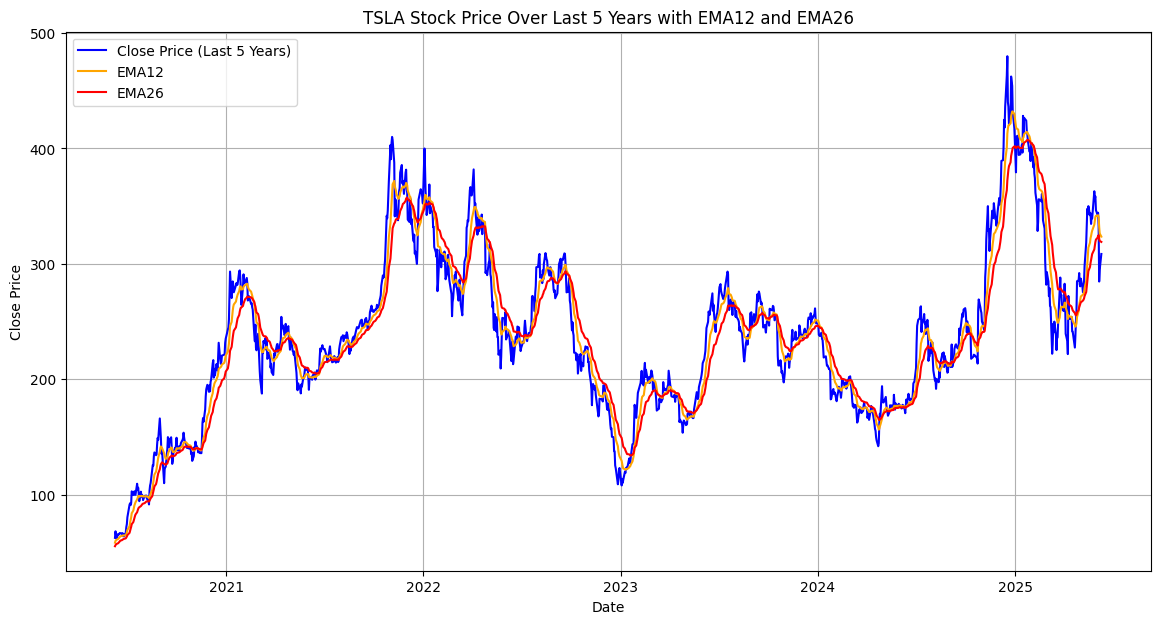

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(last_5_years.index, last_5_years['Close'], label='Close Price (Last 5 Years)', color='blue')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'EMA12'], label='EMA12', color='orange')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'EMA26'], label='EMA26', color='red')
plt.title('TSLA Stock Price Over Last 5 Years with EMA12 and EMA26')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Generate signal: 1 when short EMA > long EMA, 0 otherwise
df['EMA_Signal'] = np.where(df['EMA12'] > df['EMA26'], 1.0, 0.0)


# Calculate position changes (crossover points)
df['EMA_Position'] = df['EMA_Signal'].diff()

# Calculate strategy returns
df['EMA_Strategy_Returns'] = df['Market Returns'] * df['EMA_Signal'].shift(1)

# Calculate cumulative returns
df['EMA_Cumulative_Returns'] = (1 + df['EMA_Strategy_Returns']).cumprod()

print("\n--- Final Results for EMA Crossover Strategy ---")
print(f"Buy and Hold Cumulative Return: {df['Cumulative Market Returns'].iloc[-1]:.2f}")
print(f"EMA Strategy Cumulative Return: {df['EMA_Cumulative_Returns'].iloc[-1]:.2f}")


--- Final Results for EMA Crossover Strategy ---
Buy and Hold Cumulative Return: 21.11
EMA Strategy Cumulative Return: 12.24


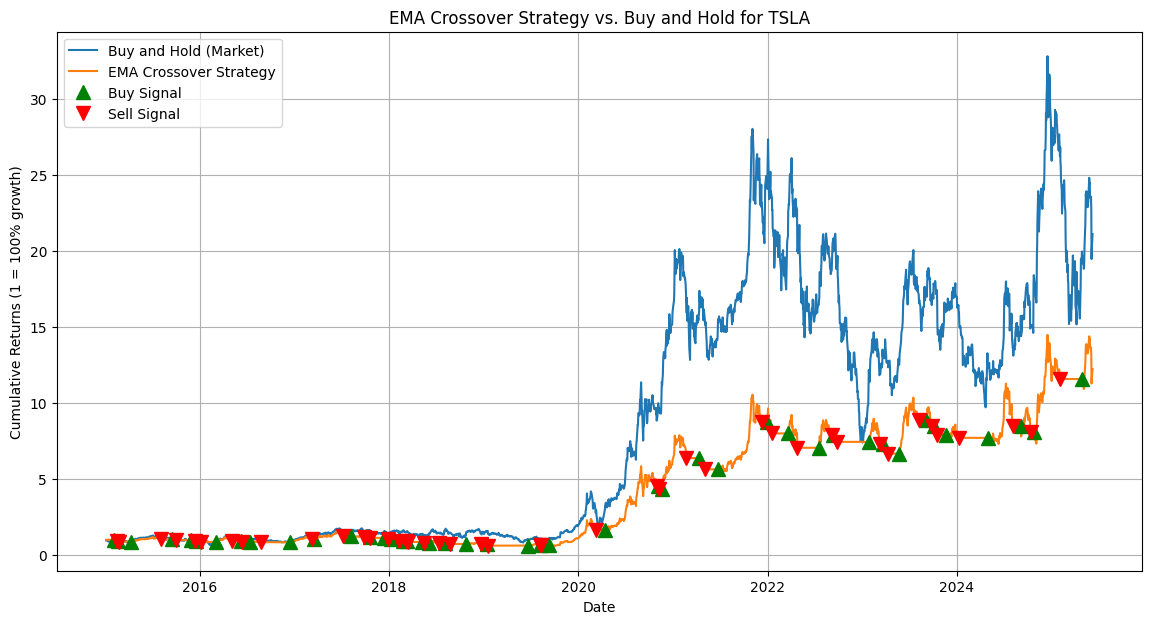

In [29]:
# Plot the equity curves
plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative Market Returns'], label='Buy and Hold (Market)')
plt.plot(df['EMA_Cumulative_Returns'], label='EMA Crossover Strategy')

# Plot buy/sell signals on the equity curve for context
plt.plot(df[df['EMA_Position'] == 1.0].index, 
         df['EMA_Cumulative_Returns'][df['EMA_Position'] == 1.0],
         '^', markersize=10, color='g', label='Buy Signal')

plt.plot(df[df['EMA_Position'] == -1.0].index, 
         df['EMA_Cumulative_Returns'][df['EMA_Position'] == -1.0],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'EMA Crossover Strategy vs. Buy and Hold for TSLA')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (1 = 100% growth)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculate the Short and Long EMAs
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()

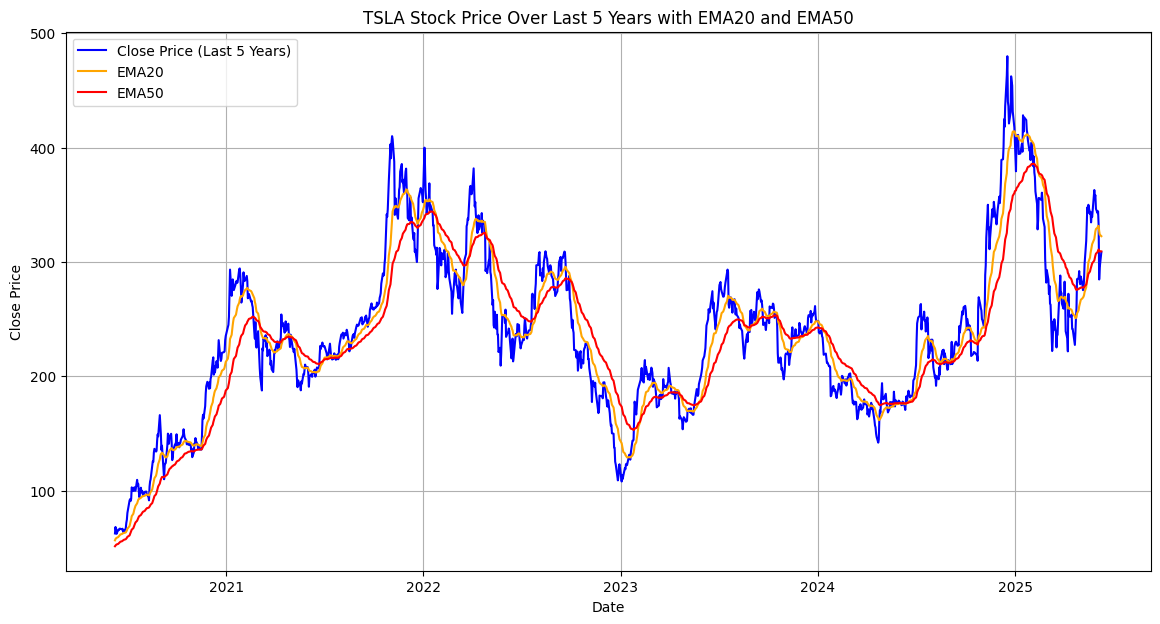

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(last_5_years.index, last_5_years['Close'], label='Close Price (Last 5 Years)', color='blue')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'EMA20'], label='EMA20', color='orange')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'EMA50'], label='EMA50', color='red')
plt.title('TSLA Stock Price Over Last 5 Years with EMA20 and EMA50')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Generate signal: 1 when short EMA > long EMA, 0 otherwise
df['EMA_Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)


# Calculate position changes (crossover points)
df['EMA_Position'] = df['EMA_Signal'].diff()

# Calculate strategy returns
df['EMA_Strategy_Returns'] = df['Market Returns'] * df['EMA_Signal'].shift(1)

# Calculate cumulative returns
df['EMA_Cumulative_Returns'] = (1 + df['EMA_Strategy_Returns']).cumprod()

print("\n--- Final Results for EMA Crossover Strategy ---")
print(f"Buy and Hold Cumulative Return: {df['Cumulative Market Returns'].iloc[-1]:.2f}")
print(f"EMA Strategy Cumulative Return: {df['EMA_Cumulative_Returns'].iloc[-1]:.2f}")


--- Final Results for EMA Crossover Strategy ---
Buy and Hold Cumulative Return: 21.11
EMA Strategy Cumulative Return: 4.63


MACD Stategy

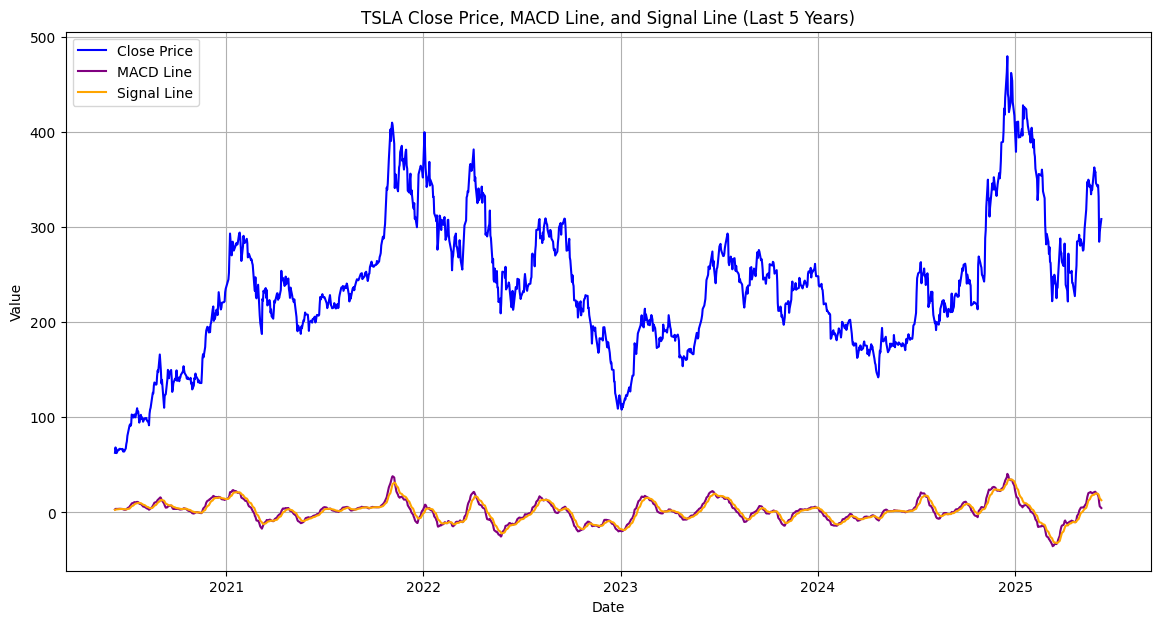

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(last_5_years.index, last_5_years['Close'], label='Close Price', color='blue')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'MACD'], label='MACD Line', color='purple')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'Signal Line'], label='Signal Line', color='orange')
plt.title('TSLA Close Price, MACD Line, and Signal Line (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

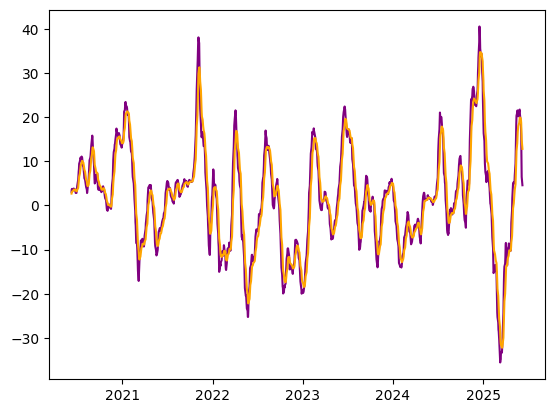

In [38]:
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'MACD'], label='MACD Line', color='purple')
plt.plot(last_5_years.index, df.loc[last_5_years.index, 'Signal Line'], label='Signal Line', color='orange')
plt.show()

In [ ]:
# --- 3. GENERATE TRADING SIGNALS ---
# 1 for a buy signal (MACD crosses above Signal Line)
# -1 for a sell signal (MACD crosses below Signal Line)
# np.where(condition, value_if_true, value_if_false)

df['MACD_Signal'] = np.where(df['MACD'] > df['Signal Line'], 1.0, 0.0)

# Create the actual position: 1 for long, -1 for short (or 0 for out of market)
# We find the exact crossover points by taking the difference
df['MACD_Position'] = df['MACD_Signal'].diff()


In [33]:
# Calculate strategy returns
df['MACD_Strategy_Returns'] = df['Market Returns'] * df['MACD_Signal'].shift(1)

# Calculate cumulative returns
df['MACD_Cumulative_Returns'] = (1 + df['MACD_Strategy_Returns']).cumprod()

print("\n--- Final Results for MACD Strategy ---")
print(f"Buy and Hold Cumulative Return: {df['Cumulative Market Returns'].iloc[-1]:.2f}")
print(f"MACD Strategy Cumulative Return: {df['MACD_Cumulative_Returns'].iloc[-1]:.2f}")


--- Final Results for MACD Strategy ---
Buy and Hold Cumulative Return: 21.11
MACD Strategy Cumulative Return: 44.45


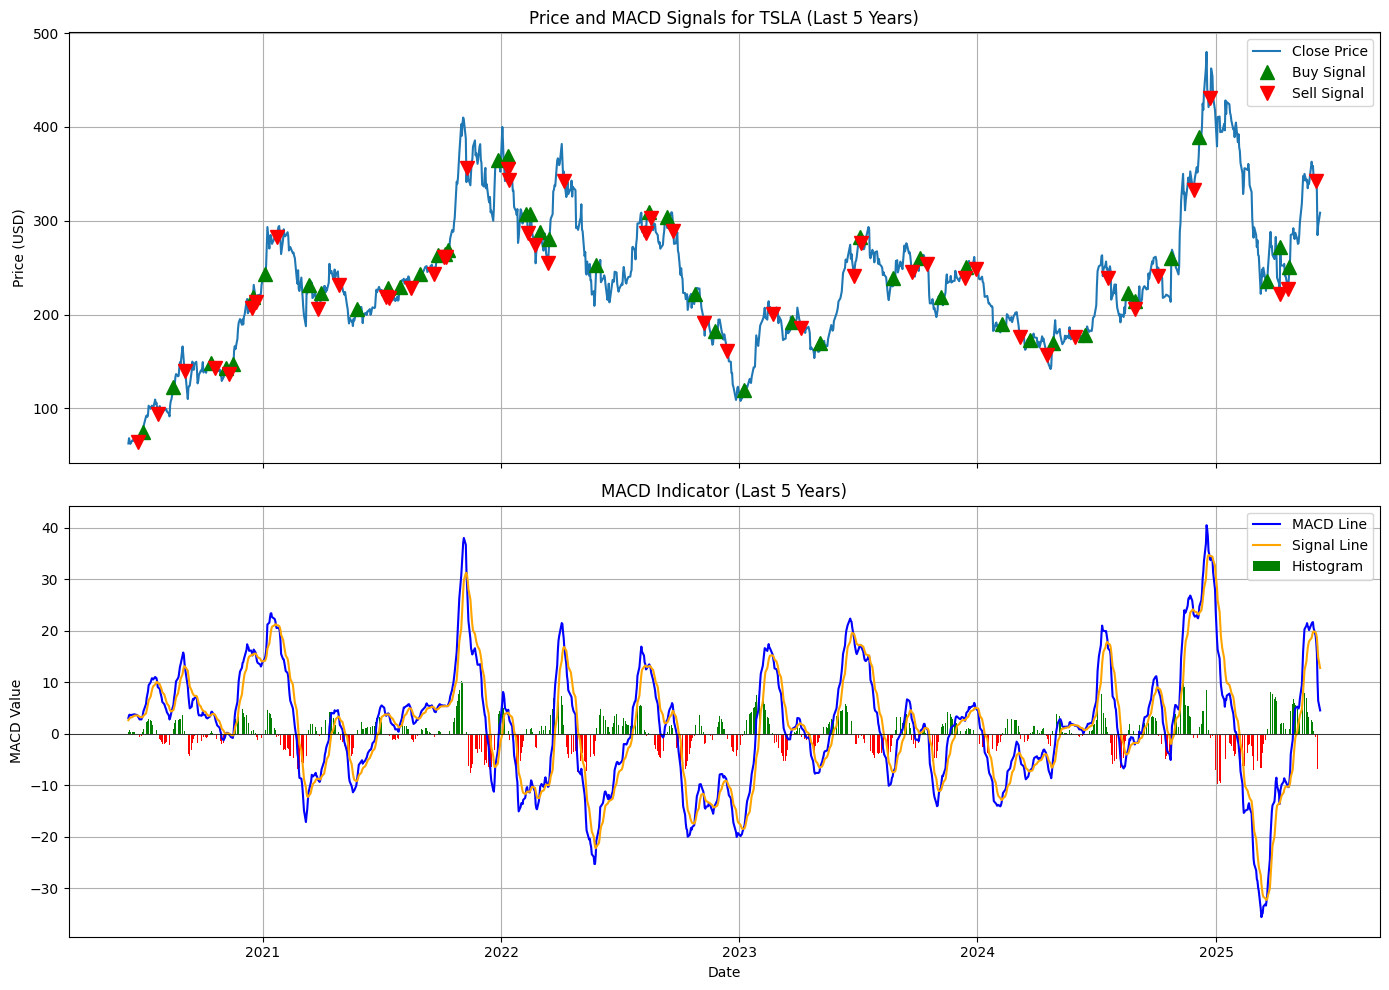

In [36]:
# Create MACD visualization for only the last 5 years
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Price and Buy/Sell markers (last 5 years only)
ax1.plot(last_5_years.index, df.loc[last_5_years.index, 'Close'], label='Close Price')
ax1.set_title('Price and MACD Signals for TSLA (Last 5 Years)')
ax1.set_ylabel('Price (USD)')
ax1.grid()

# Plot buy signals (filtered for last 5 years)
buy_signals = df[(df['MACD_Position'] == 1) & (df.index >= last_5_years.index[0])]
ax1.plot(buy_signals.index, 
         buy_signals['Close'], 
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals (filtered for last 5 years)
sell_signals = df[(df['MACD_Position'] == -1) & (df.index >= last_5_years.index[0])]
ax1.plot(sell_signals.index, 
         sell_signals['Close'], 
         'v', markersize=10, color='r', label='Sell Signal')
ax1.legend()

# Plot 2: MACD, Signal Line, and Histogram (last 5 years only)
ax2.plot(last_5_years.index, df.loc[last_5_years.index, 'MACD'], label='MACD Line', color='blue')
ax2.plot(last_5_years.index, df.loc[last_5_years.index, 'Signal Line'], label='Signal Line', color='orange')

# Bar chart for histogram (last 5 years only)
histogram_data = df.loc[last_5_years.index, 'Histogram']
ax2.bar(last_5_years.index, histogram_data, 
        label='Histogram', 
        color=histogram_data.apply(lambda x: 'g' if x>=0 else 'r'))

ax2.set_title('MACD Indicator (Last 5 Years)')
ax2.set_ylabel('MACD Value')
ax2.set_xlabel('Date')
ax2.axhline(0, color='black', linewidth=0.5) # The zero line
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()